# OPTIONAL notebook 

## 1. Dataframes et package Pandas

 We can open the `iris` file to obtain a dataframe. To manipulate dataframes, we need the `pandas` package.

In [20]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [21]:
X = iris.data
y = iris.target
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

X is a dataframe and y is a series.

To answer the following questions, you can use this tutorial:  https://pandas.pydata.org/docs/user_guide/10min.html

**Question 1** Use some functions described in the tutorial to get information about the dataframe X and the series y.
Specifically, display the types of explanatory variables, the names of explanatory variables, and the number of flowers in each category (setosa, versicolor and virginica) in `y`.  

In [22]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [24]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y.value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

# 2.  Confusion matrix, accuracy score and stratify

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)

**Question 2** Display the confusion matrix related to  test data (X_test,y_test), see https://en.wikipedia.org/wiki/Confusion_matrix 
Compute the accuracy score using this matrix. 

In [32]:
from sklearn.metrics import confusion_matrix

m = confusion_matrix(y_test, predictions)
m

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

In [42]:
import numpy as np

accuracy = np.sum(np.diag(m)) / np.size(y_test)
print(accuracy)

0.98


**Question 3** Display the accuracy score directly (without the confusing matrix). 

In [43]:
knn_clf.score(X_test, y_test)

0.98

**Question 4** Display the number of individuals for each label in the series `y_test` and observe that the distribution is not uniform across labels, unlike in the original `y` data.

In [44]:
y_test.value_counts()

target
0    19
2    16
1    15
Name: count, dtype: int64

**Question 5** Use the `stratify` parameter in `train_test_split` to create a new split into training and test samples, ensuring that the distribution of each label in the test sample matches that of the initial sample (i.e., in this case, an equal number of individuals with labels y=0, y=1, and y=2). (Verify the result)

In [45]:
X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(X, y, test_size=0.33, random_state=42,
                                                                            stratify=y)

y_test_strat.value_counts()

target
2    17
1    17
0    16
Name: count, dtype: int64

# 3.Dataframes and graphs

We will use a new dataset called housing.

This dataset includes features such as population, median income, and median house price for each geographic unit (with a population of 600 to 3,000 people). In this case, the individuals (or data points) essentially represent neighborhoods.

In [46]:
housing = pd.read_csv('data/housing.csv')

In [47]:
type(housing)

pandas.core.frame.DataFrame

**Question 6** Display the main information about the housing dataset. Notice that there are missing data. What is the type of each column?

In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can try to predict the variable `median_house_values` based on all other variables. 

We'll start with a geographical visualization of the data: (these are California data)

<Axes: xlabel='longitude', ylabel='latitude'>

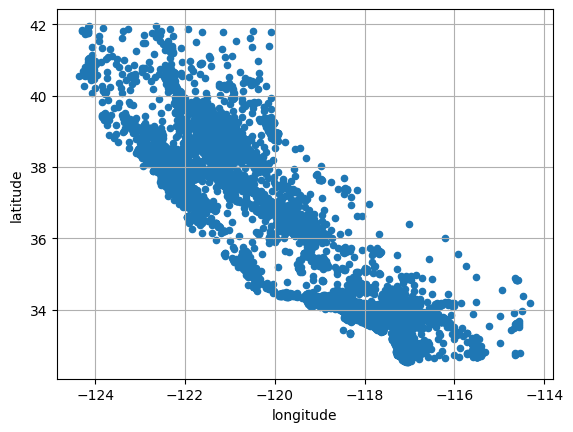

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)

**Question 7** Use a transparency argument  to better visualize areas with high density.

<details> 
    <summary> Hint
        </summary> use the `alpha` parameter. 
        </details>
        
        

<Axes: xlabel='longitude', ylabel='latitude'>

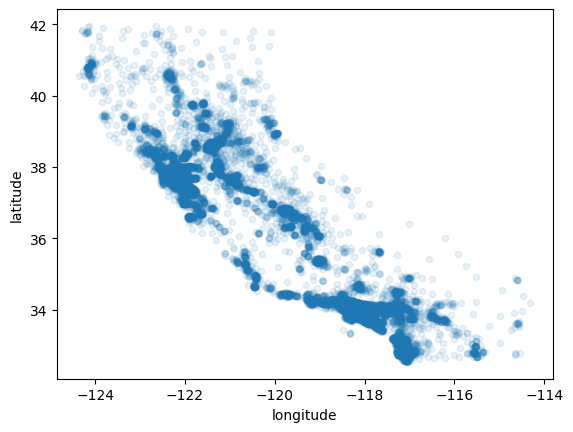

In [51]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

**Question 8** Make the points, which are meant to represent neighborhoods, have a size proportional to the neighborhood's population and vary in color according to the median_house_value of the neighborhood. Display the legend and the colorbar. You can use the following example as a guide: https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

Hint: Use the population divided by 100 for the point sizes.


<Axes: xlabel='longitude', ylabel='latitude'>

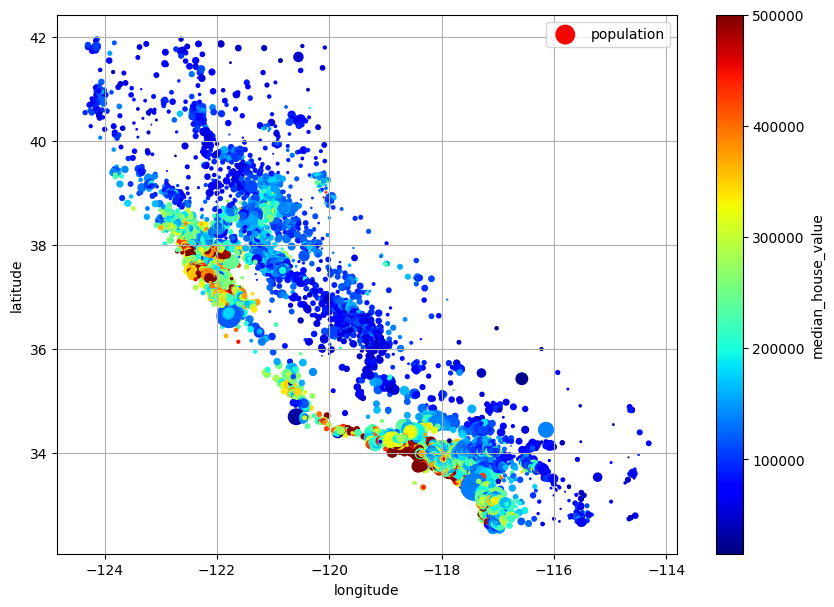

In [52]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

We can display scatter plots for all pairs of columns in a dataframe using the `scatter_matrix` function from the `pandas.plotting` package. Since there are 11 columns, we won't represent all 11^2=121 corresponding graphs, but only a few of them. 

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

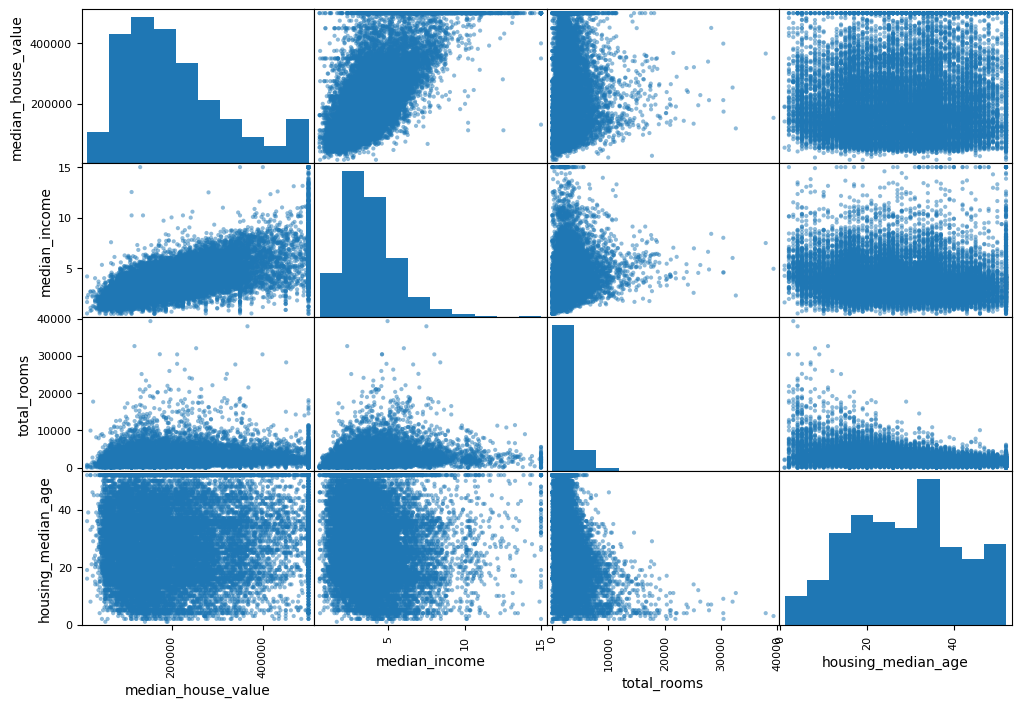

In [53]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Looking at the diagonal, we can see the histograms for each column. By examining these graphs, it appears that the variable most correlated with median_house_value is median_income.

**Question 9** Display the correlations between the target median_house_value and the other variables, in descending order. For the correlation matrix, use `housing.corr`. 

In [56]:
corr = housing.corr(numeric_only=True)
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [59]:
print(corr["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [61]:
print(corr["median_house_value"].abs().sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64


## 3. Extra exercises on pandas

Many exercises here : https://github.com/guipsamora/pandas_exercises/tree/master
(with  solutions).